In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import *

In [45]:
inputfile = "05jun_fcfs.txt"

fcfs = pd.read_table("05jun_fcfs.txt", " ")
llv = pd.read_table("06jun_llv.txt", " ")

In [46]:
def cleanse(df):
    df['dt1'] = df['dt1'] + " " + df['dt2'] + " " + df['dt3'] + " " + df['dt4']
    df = df.drop(['dt2', 'dt3', 'dt4', 'collisions', 'unknown'], axis=1)
    df['dt1'] = df['dt1'].apply(lambda x: pd.to_datetime(parse(x)))
    minval = df['dt1'].min()
    df['dt1'] = df['dt1'].apply(lambda x: x - minval)
    df = df.sort_values(by='dt1')
    df['profit'] = ((df['revenue'] - df['costs'])/100) - df['penalties']
    df['avgDelTime'] = df['avgDelTime'] / 60
    df['avgWaitTime'] = df['avgWaitTime'] / 60
    df['delTimes'] = df['avgDelTime'] - df['avgWaitTime']
    df['avgProfitPerDelivery'] = df['profit'] / df['deliveries']
    df['avgRevenuePerDelivery'] = df['revenue'] / df['deliveries']
    return df

fcfs = cleanse(fcfs)
llv = cleanse(llv)



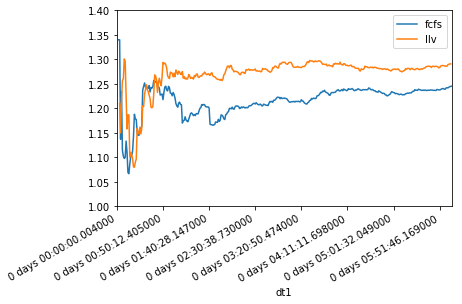

In [48]:
yaxis = 'avgProfitPerDelivery'
controller = 3;

fcfsx = fcfs.loc[fcfs['controller'] == controller]
llvx = llv.loc[llv['controller'] == controller]

ax = fcfsx.plot(x='dt1', y=yaxis)
llvx.plot(x='dt1', y=yaxis, ax=ax)
ax.legend(["fcfs", "llv"]);
ax.set_ylim([1, 1.4])
plt.show()